In [1]:
import sys
sys.path.append(str('/home/jupyter/SearchForecasting/'))
import pandas as pd
from configparser import ConfigParser
from repo.MyConfigParser import MyConfigParser
from repo.Optimization import SavantPSO
import numpy as np

# Read In

In [2]:
updated_config = ConfigParser()
config_in_path = "/home/jupyter/SearchForecasting/India/June 2024 Update/config ups india.ini"
updated_config.read(config_in_path)

getdict = MyConfigParser()
config_dict=getdict.GetDict(updated_config)
region = config_dict['CLIENTINFO']['country']
cutoff_month = config_dict['PROPHETSETTING']['cut_off_point']
base_start = config_dict['PROPHETSETTING']['reference_start_date1']
base_end = config_dict['PROPHETSETTING']['reference_end_date1']
periods = config_dict['PROPHETSETTING']['periods']
base_periods  = config_dict['PROPHETSETTING']['base_periods']

output_bucket = config_dict["FILEPATH"]["output_bucket"]
folder_name = config_dict["FILEPATH"]["folder_name"]

base_path = config_dict["FILEPATH"]["base_path"]

boundary_df_in_path = base_path + config_dict["FILEPATH"]["boundary_df_in_path"]
daily_df_out_path = base_path + config_dict["FILEPATH"]["daily_df_out_path"]
analytical_file_path = base_path + config_dict["FILEPATH"]["analytical_file_path"]
cuts_df_in_path = base_path + config_dict["FILEPATH"]["cuts_df_in_path"]
plot_name = base_path + config_dict["FILEPATH"]["plot_name"]
constraint_file_name = base_path + config_dict["FILEPATH"]["constraint_file_name"]
breakdown_ls = [config_dict['CLIENTINFO'][i] for i in [f'breakdown{i}' for i in range(1,5)] if config_dict['CLIENTINFO'][i] != None]

small_market_str = ''
pre_forecast_period_budget = float(config_dict['CLIENTINFO']['pre_forecast_period_budget'])
client_budget = float(config_dict['CLIENTINFO']['client_budget'])

save_date = config_dict['CLIENTINFO']['save_date']

In [3]:
# Get forecasters
bdDf = pd.read_csv(cuts_df_in_path)#.drop('Unnamed: 0', axis = 1)
cuts_df = bdDf.reset_index(drop = True)
cuts_df['forecaster_name_list'] =  cuts_df['market'] + ' ' + cuts_df['account_type'] + ' ' + cuts_df['funnel'] + '.pkl' #' 05.19.2021 Final.pkl'
cuts_df['periods'] = periods
# get model list
forecasters_array = cuts_df.forecaster_name_list

# Get analytical file
analytical_file = pd.read_csv(analytical_file_path).drop('Unnamed: 0', axis = 1)
analytical_file['ds'] = pd.to_datetime(analytical_file['ds'])
analytical_file_check_version = analytical_file.copy()

# Get constrain file
constraint_file = pd.read_csv(constraint_file_name)
constraint_file['init'] = constraint_file[['MinWeight', 'MaxWeight']].mean(axis = 1)
cuts_df.drop(columns='Unnamed: 0', inplace=True)

# Functions

In [5]:
resultPSO = SavantPSO(cuts_df, analytical_file, constraint_file, config_dict)

In [ ]:
itNum = 140
options = {'c1': 0.20255337412386598,
 'c2': 0.034812002156869526,
 'w': 0.8707709059066462}
result = resultPSO.run_pso(options, itNum = itNum)

2024-06-05 16:00:38,521 - pyswarms.single.global_best - INFO - Optimize for 140 iters with {'c1': 0.20255337412386598, 'c2': 0.034812002156869526, 'w': 0.8707709059066462}


/home/jupyter/SearchForecasting/India/June 2024 Update/Input Weight History 06.05.2024.csv


pyswarms.single.global_best:   0%|          |0/140

--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27022.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27022.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27022.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27022.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.-----------

pyswarms.single.global_best:   1%|          |1/140, best_cost=-2.7e+4

yhat: -27022.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26989.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26798.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27123.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26884.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:   1%|▏         |2/140, best_cost=-27353.0

yhat: -26772.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26847.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27080.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27090.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27059.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:   2%|▏         |3/140, best_cost=-27353.0

yhat: -27016.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27064.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26813.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26943.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26854.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:   3%|▎         |4/140, best_cost=-27353.0

yhat: -27157.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27106.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27007.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26678.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26971.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:   4%|▎         |5/140, best_cost=-27353.0

yhat: -26981.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26954.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26850.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26788.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27090.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:   4%|▍         |6/140, best_cost=-27410.0

yhat: -26772.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27064.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26776.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26936.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26915.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:   5%|▌         |7/140, best_cost=-27410.0

yhat: -26972.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26929.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26590.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26784.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27249.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:   6%|▌         |8/140, best_cost=-27410.0

yhat: -26592.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27071.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26980.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27073.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27044.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:   6%|▋         |9/140, best_cost=-27410.0

yhat: -27119.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27294.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26762.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26869.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27016.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:   7%|▋         |10/140, best_cost=-27410.0

yhat: -26803.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26896.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26753.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26994.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27273.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:   8%|▊         |11/140, best_cost=-27410.0

yhat: -27191.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27170.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26775.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26926.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26865.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:   9%|▊         |12/140, best_cost=-27410.0

yhat: -26888.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27136.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26939.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27008.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27051.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:   9%|▉         |13/140, best_cost=-27410.0

yhat: -27233.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26920.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26904.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27264.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27061.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  10%|█         |14/140, best_cost=-27410.0

yhat: -26827.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27089.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27017.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26912.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27076.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  11%|█         |15/140, best_cost=-27410.0

yhat: -27108.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27233.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27017.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26829.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26753.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  11%|█▏        |16/140, best_cost=-27410.0

yhat: -27133.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26842.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26865.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27050.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26947.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  12%|█▏        |17/140, best_cost=-27410.0

yhat: -26840.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27065.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26712.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26883.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27030.0
client_budget - analytical_spend_latest_period: 0
--------

pyswarms.single.global_best:  13%|█▎        |18/140, best_cost=-27410.0

yhat: -27050.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27290.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27047.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26814.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27057.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  14%|█▎        |19/140, best_cost=-27410.0

yhat: -27010.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26977.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26971.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27108.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27022.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  14%|█▍        |20/140, best_cost=-27410.0

yhat: -26781.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27151.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26972.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26934.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26888.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  15%|█▌        |21/140, best_cost=-27410.0

yhat: -27047.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26967.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26743.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26875.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26923.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  16%|█▌        |22/140, best_cost=-27410.0

yhat: -27010.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27046.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26918.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27115.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27113.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  16%|█▋        |23/140, best_cost=-27410.0

yhat: -27235.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27065.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27090.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27056.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27162.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  17%|█▋        |24/140, best_cost=-27410.0

yhat: -26840.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27108.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27164.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26869.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26745.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  18%|█▊        |25/140, best_cost=-27410.0

yhat: -27093.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26946.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27178.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27180.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26839.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  19%|█▊        |26/140, best_cost=-27410.0

yhat: -27085.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27152.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27125.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27093.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27096.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  19%|█▉        |27/140, best_cost=-27410.0

yhat: -26817.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27002.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26733.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26829.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27079.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  20%|██        |28/140, best_cost=-27410.0

yhat: -27078.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27047.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27066.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26787.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26678.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  21%|██        |29/140, best_cost=-27410.0

yhat: -27037.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26922.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27032.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27014.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26765.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  21%|██▏       |30/140, best_cost=-27410.0

yhat: -26975.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27160.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27049.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26726.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26940.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  22%|██▏       |31/140, best_cost=-27410.0

yhat: -27080.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26981.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26872.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27055.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27022.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  23%|██▎       |32/140, best_cost=-27410.0

yhat: -27154.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27153.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26898.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27188.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26973.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  24%|██▎       |33/140, best_cost=-27410.0

yhat: -26960.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27335.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26936.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26837.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27024.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  24%|██▍       |34/140, best_cost=-27410.0

yhat: -27048.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26992.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27092.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26940.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27084.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  25%|██▌       |35/140, best_cost=-27410.0

yhat: -27135.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27179.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26969.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27091.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26827.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  26%|██▌       |36/140, best_cost=-27410.0

yhat: -27012.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27016.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27036.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27162.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26810.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  26%|██▋       |37/140, best_cost=-27410.0

yhat: -27029.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27188.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27008.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26885.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27139.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  27%|██▋       |38/140, best_cost=-27410.0

yhat: -27081.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27016.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27061.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27178.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26648.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  28%|██▊       |39/140, best_cost=-27410.0

yhat: -26971.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27197.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27253.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26757.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27003.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  29%|██▊       |40/140, best_cost=-27410.0

yhat: -26980.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27193.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26782.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27083.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27239.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  29%|██▉       |41/140, best_cost=-27410.0

yhat: -27008.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27324.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27184.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27067.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26733.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  30%|███       |42/140, best_cost=-27410.0

yhat: -26958.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27114.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27010.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26938.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26966.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  31%|███       |43/140, best_cost=-27410.0

yhat: -27092.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27292.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27015.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26938.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27064.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  31%|███▏      |44/140, best_cost=-27410.0

yhat: -26976.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27265.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27013.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27035.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26844.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  32%|███▏      |45/140, best_cost=-27410.0

yhat: -26965.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27258.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26857.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26788.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27066.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  33%|███▎      |46/140, best_cost=-27410.0

yhat: -27020.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27043.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27129.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27134.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27127.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  85%|████████▌ |119/140, best_cost=-27507.0

yhat: -27215.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27296.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27272.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26890.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27314.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  86%|████████▌ |120/140, best_cost=-27507.0

yhat: -27001.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27083.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27117.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26980.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27357.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  86%|████████▋ |121/140, best_cost=-27507.0

yhat: -27143.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27173.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27360.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27276.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27292.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  87%|████████▋ |122/140, best_cost=-27507.0

yhat: -27298.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27298.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26978.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26869.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27258.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  88%|████████▊ |123/140, best_cost=-27507.0

yhat: -26994.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27274.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27252.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26976.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27223.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  89%|████████▊ |124/140, best_cost=-27507.0

yhat: -27207.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27176.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27093.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27085.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27445.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  89%|████████▉ |125/140, best_cost=-27507.0

yhat: -27160.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27164.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27113.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26936.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27192.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  90%|█████████ |126/140, best_cost=-27507.0

yhat: -27007.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27258.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26971.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27017.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27409.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  91%|█████████ |127/140, best_cost=-27520.0

yhat: -27197.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27107.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27283.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27125.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27157.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  91%|█████████▏|128/140, best_cost=-27520.0

yhat: -27132.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27151.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26925.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26970.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27384.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  92%|█████████▏|129/140, best_cost=-27520.0

yhat: -27305.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27325.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27241.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27074.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27133.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  93%|█████████▎|130/140, best_cost=-27520.0

yhat: -26959.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27112.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27146.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26926.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27361.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  94%|█████████▎|131/140, best_cost=-27520.0

yhat: -27090.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27113.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27198.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27052.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27342.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  94%|█████████▍|132/140, best_cost=-27520.0

yhat: -27236.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27297.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27081.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -26951.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27305.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  95%|█████████▌|133/140, best_cost=-27520.0

yhat: -27153.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27176.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27146.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27030.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27293.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  96%|█████████▌|134/140, best_cost=-27520.0

yhat: -27122.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27202.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27055.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26936.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27245.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  96%|█████████▋|135/140, best_cost=-27520.0

yhat: -27101.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27195.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27338.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27087.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27231.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  97%|█████████▋|136/140, best_cost=-27520.0

yhat: -27275.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27077.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27173.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26891.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27433.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  98%|█████████▊|137/140, best_cost=-27520.0

yhat: -27053.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27151.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27240.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27248.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27172.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  99%|█████████▊|138/140, best_cost=-27520.0

yhat: -27032.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27308.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27282.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -26982.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27371.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  99%|█████████▉|139/140, best_cost=-27520.0

yhat: -27271.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27083.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27269.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  0.0
yhat: -27057.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  158553.0 difference between planned and forecast X:  -0.0
yhat: -27094.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best: 100%|██████████|140/140, best_cost=-27520.0
2024-06-05 17:20:38,865 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -27520.0, best pos: [1.08392183 1.18324575 1.16055523 0.88880175 1.16516699 1.08062024
 1.16692865 0.97063195 1.10062439 0.98006677 0.9462516  0.89818892
 0.882998   0.97606488 1.02536533 0.95041016 0.94399377 0.95722929]


yhat: -27092.0
client_budget - analytical_spend_latest_period: 0
Compute duration: 4800.345428705215


/home/jupyter/SearchForecasting/India/June 2024 Update/Pos Result 06.05.2024.csv
File generated
/home/jupyter/SearchForecasting/India/June 2024 Update/Iteration History 06.05.2024.csv
File generated


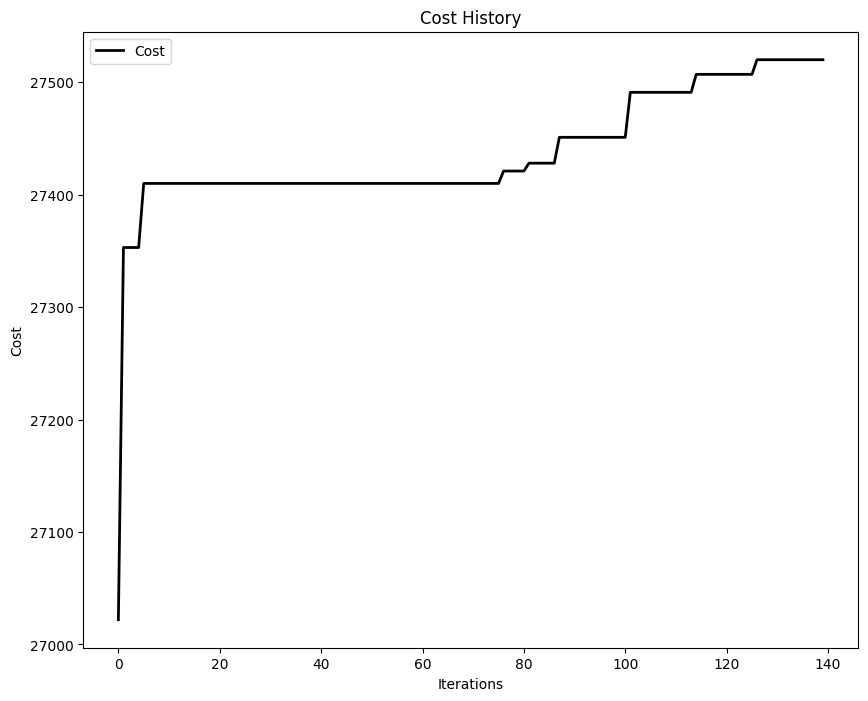

In [ ]:
resultPSO.SaveResult(result)